<a href="https://colab.research.google.com/github/Vsevolod245/CV_MAI_2023/blob/main/HW3_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks.txt

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота. Однако мы с вами заметили, что поворот происходит относительно нуля координат, что может приводить не совсем к тому результату, который мы ожидаем получить. Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат). Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр. Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами, построить композицию преобразований в виде единой матрицы? Как это сделать? Для проведения экспериментов используйте изображение messi5.jpg

Задание 2: В папке находятся изображения (все кроме messi5.jpg), которые были подвернуты различным деформациям. Используя аффинные преобразования, необходимо "выправить" эти изображения (привести в исходный вид).


---



In [ ]:
import sys
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np
from math import sin, cos, pi

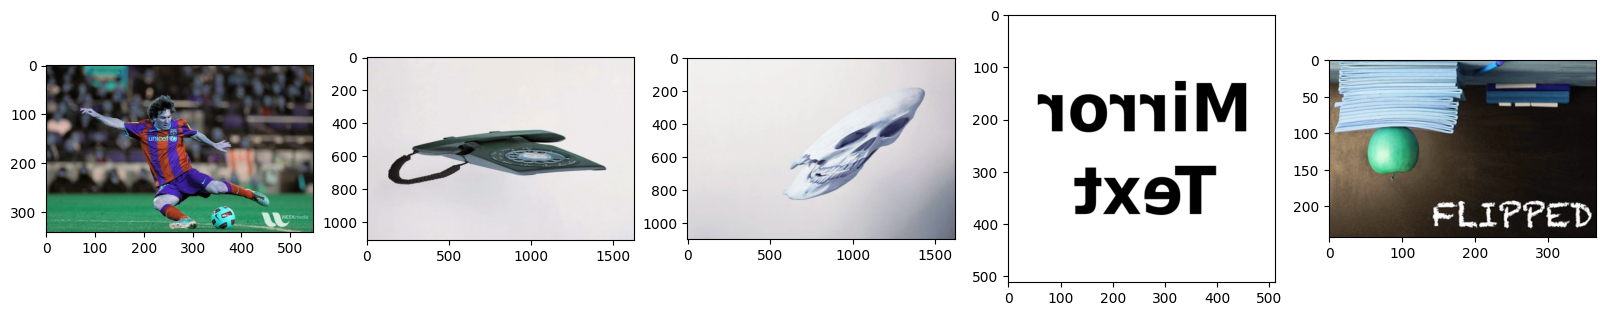

In [ ]:
# загружаем картинки
req1 = urlopen('https://i.imgur.com/wAbaZlQ.jpg')
arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
img_messi = cv2.imdecode(arr1, -1)
req2 = urlopen('https://i.imgur.com/aqAHjzp.png')
arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
img_phone = cv2.imdecode(arr2, -1)
req3 = urlopen('https://i.imgur.com/frf5s5V.png')
arr3 = np.asarray(bytearray(req3.read()), dtype=np.uint8)
img_skull = cv2.imdecode(arr3, -1)
req4 = urlopen('https://i.imgur.com/akMNWNT.png')
arr4 = np.asarray(bytearray(req4.read()), dtype=np.uint8)
img_text = cv2.imdecode(arr4, -1)
req5 = urlopen('https://i.imgur.com/IFHyLfd.jpg')
arr5 = np.asarray(bytearray(req5.read()), dtype=np.uint8)
img_apple = cv2.imdecode(arr5, -1)
plt.figure(figsize=(20, 20))
plt.subplot(1, 5, 1)
plt.imshow(img_messi)
plt.subplot(1, 5, 2)
plt.imshow(img_phone)
plt.subplot(1, 5, 3)
plt.imshow(img_skull)
plt.subplot(1, 5, 4)
plt.imshow(img_text)
plt.subplot(1, 5, 5)
plt.imshow(img_apple)



---


Задание 1

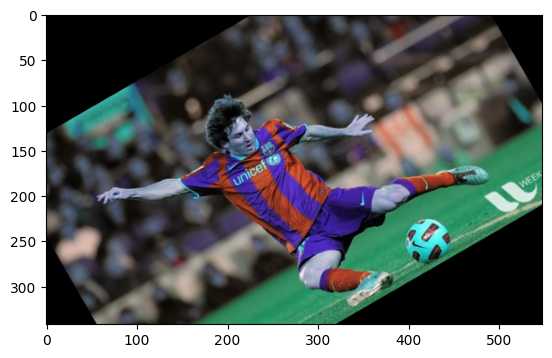

In [ ]:
height, width = img_messi.shape[:2]
center = (width/2,height/2)
angle = 30
M = cv2.getRotationMatrix2D(center, angle, 1)
dst = cv2.warpAffine(img_messi, M, (width, height))
plt.imshow(dst)



---


Задание 2

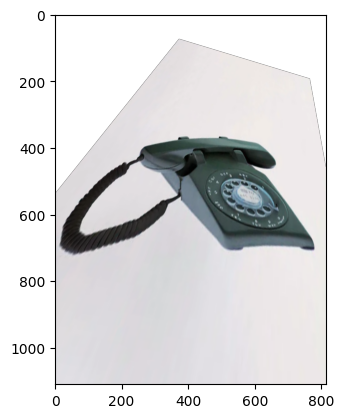

In [ ]:
height, width = img_phone.shape[:2]
pts1 = np.float32([[250,550],[1100,450],[900,700],[1400,650]])
pts2 = np.float32([[500,400],[1250,400],[1000,670],[1500,650]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img_phone, M, (width,height))
S = np.float32([
    [0.5, 0, 0],
    [0, 1, 0]]
)
dst = cv2.warpAffine(dst, S, (int(width*0.5),height))
plt.imshow(dst)

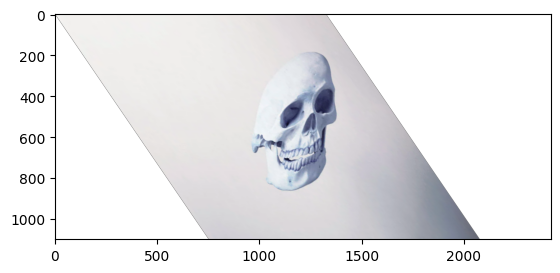

In [ ]:
height, width = img_skull.shape[:2]
pts1 = np.float32([[1300,200],[0,0],[1,1]])
pts2 = np.float32([[800,200],[0,0],[1,1]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img_skull,M,(width,height))
S = np.float32([
    [1.5, 0, 0],
    [0, 1, 0]]
)
dst = cv2.warpAffine(dst, S, (int(width*1.5),height))
plt.imshow(dst)

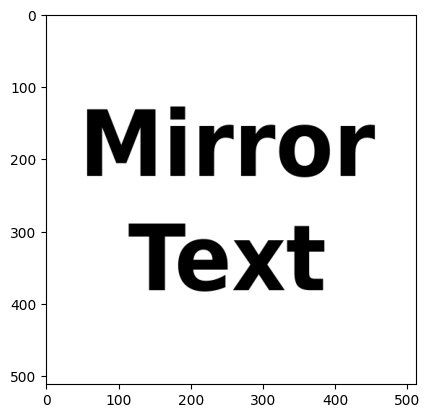

In [ ]:
height, width = img_text.shape[:2]
input_pts = np.float32([[0,0], [width-1,0], [0,height-1]])
output_pts = np.float32([[width-1,0], [0,0], [width-1,height-1]])
M = cv2.getAffineTransform(input_pts , output_pts)
dst = cv2.warpAffine(img_text, M, (width,height))
plt.imshow(dst)

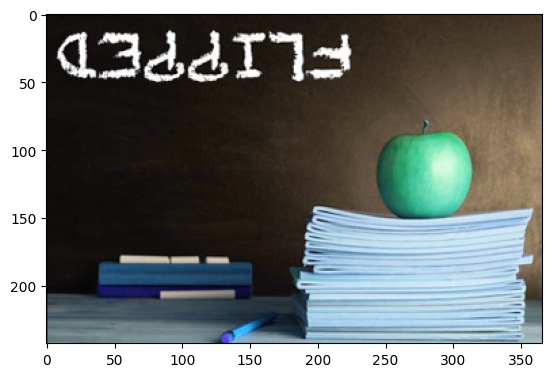

In [ ]:
height, width = img_apple.shape[:2]
center = (width/2,height/2)
angle = 180
M = cv2.getRotationMatrix2D(center, angle, 1)
dst = cv2.warpAffine(img_apple, M, (width, height))
plt.imshow(dst)